# Global temperature from 1880-2016
* time series
* long format

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

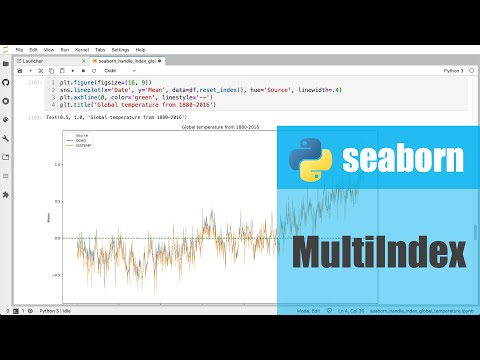

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('EEX5n3cIpsQ', width=720, height=405)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas version:  {pd.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version:  0.25.3
seaborn version: 0.9.0


In [4]:
pd.Timestamp.now()

Timestamp('2020-01-15 09:15:29.381568')

In [5]:
from IPython.display import IFrame
IFrame('https://datahub.io/core/global-temp', width=900, height=400)

In [6]:
url='https://datahub.io/core/global-temp/r/monthly.csv'
df=pd.read_csv(url)
df

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 3 columns):
Source    3288 non-null object
Date      3288 non-null object
Mean      3288 non-null float64
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


In [8]:
url='https://datahub.io/core/global-temp/r/monthly.csv'
df=pd.read_csv(url, index_col=['Source', 'Date'], parse_dates=['Date'])
df

,,Mean
Source,Date,
GCAG,2016-12-06,0.7895
GISTEMP,2016-12-06,0.8100
GCAG,2016-11-06,0.7504
GISTEMP,2016-11-06,0.9300
GCAG,2016-10-06,0.7292
...,...,...
GISTEMP,1880-03-06,-0.1800
GCAG,1880-02-06,-0.1229
GISTEMP,1880-02-06,-0.2100


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3288 entries, (GCAG, 2016-12-06 00:00:00) to (GISTEMP, 1880-01-06 00:00:00)
Data columns (total 1 columns):
Mean    3288 non-null float64
dtypes: float64(1)
memory usage: 48.3+ KB


In [10]:
df.loc['GISTEMP']

,Mean
Date,
2016-12-06,0.81
2016-11-06,0.93
2016-10-06,0.89
2016-09-06,0.87
2016-08-06,0.98
...,...
1880-05-06,-0.14
1880-04-06,-0.27
1880-03-06,-0.18


In [11]:
df.sort_values(['Date', 'Source'], inplace=True)
df

,,Mean
Source,Date,
GCAG,1880-01-06,0.0009
GISTEMP,1880-01-06,-0.3000
GCAG,1880-02-06,-0.1229
GISTEMP,1880-02-06,-0.2100
GCAG,1880-03-06,-0.1357
...,...,...
GISTEMP,2016-10-06,0.8900
GCAG,2016-11-06,0.7504
GISTEMP,2016-11-06,0.9300


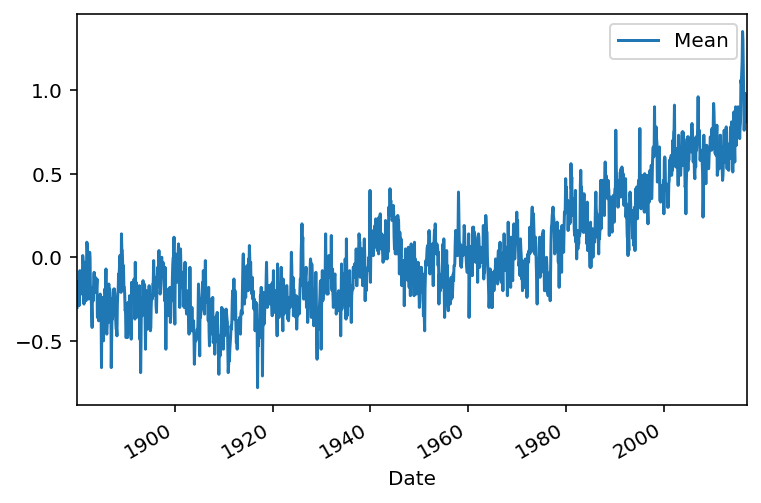

In [12]:
df.loc['GISTEMP'].plot()

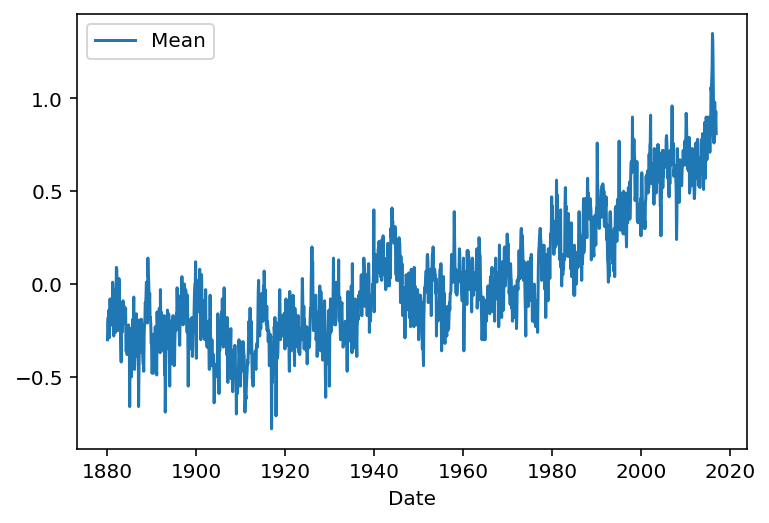

In [13]:
sns.lineplot(data=df.loc['GISTEMP'])

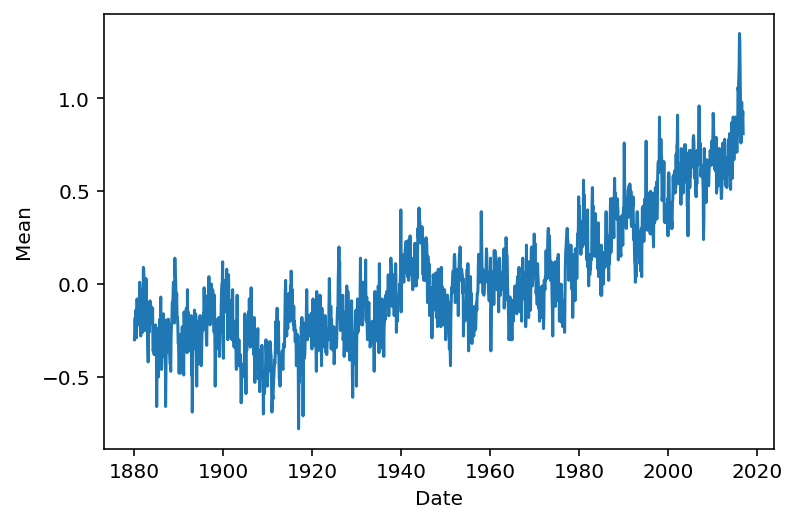

In [14]:
dg=df.loc['GISTEMP']
sns.lineplot(x=dg.index, y=dg['Mean'])

In [15]:
df.reset_index()

,Source,Date,Mean
0,GCAG,1880-01-06,0.0009
1,GISTEMP,1880-01-06,-0.3000
2,GCAG,1880-02-06,-0.1229
3,GISTEMP,1880-02-06,-0.2100
4,GCAG,1880-03-06,-0.1357
...,...,...,...
3283,GISTEMP,2016-10-06,0.8900
3284,GCAG,2016-11-06,0.7504
3285,GISTEMP,2016-11-06,0.9300
3286,GCAG,2016-12-06,0.7895


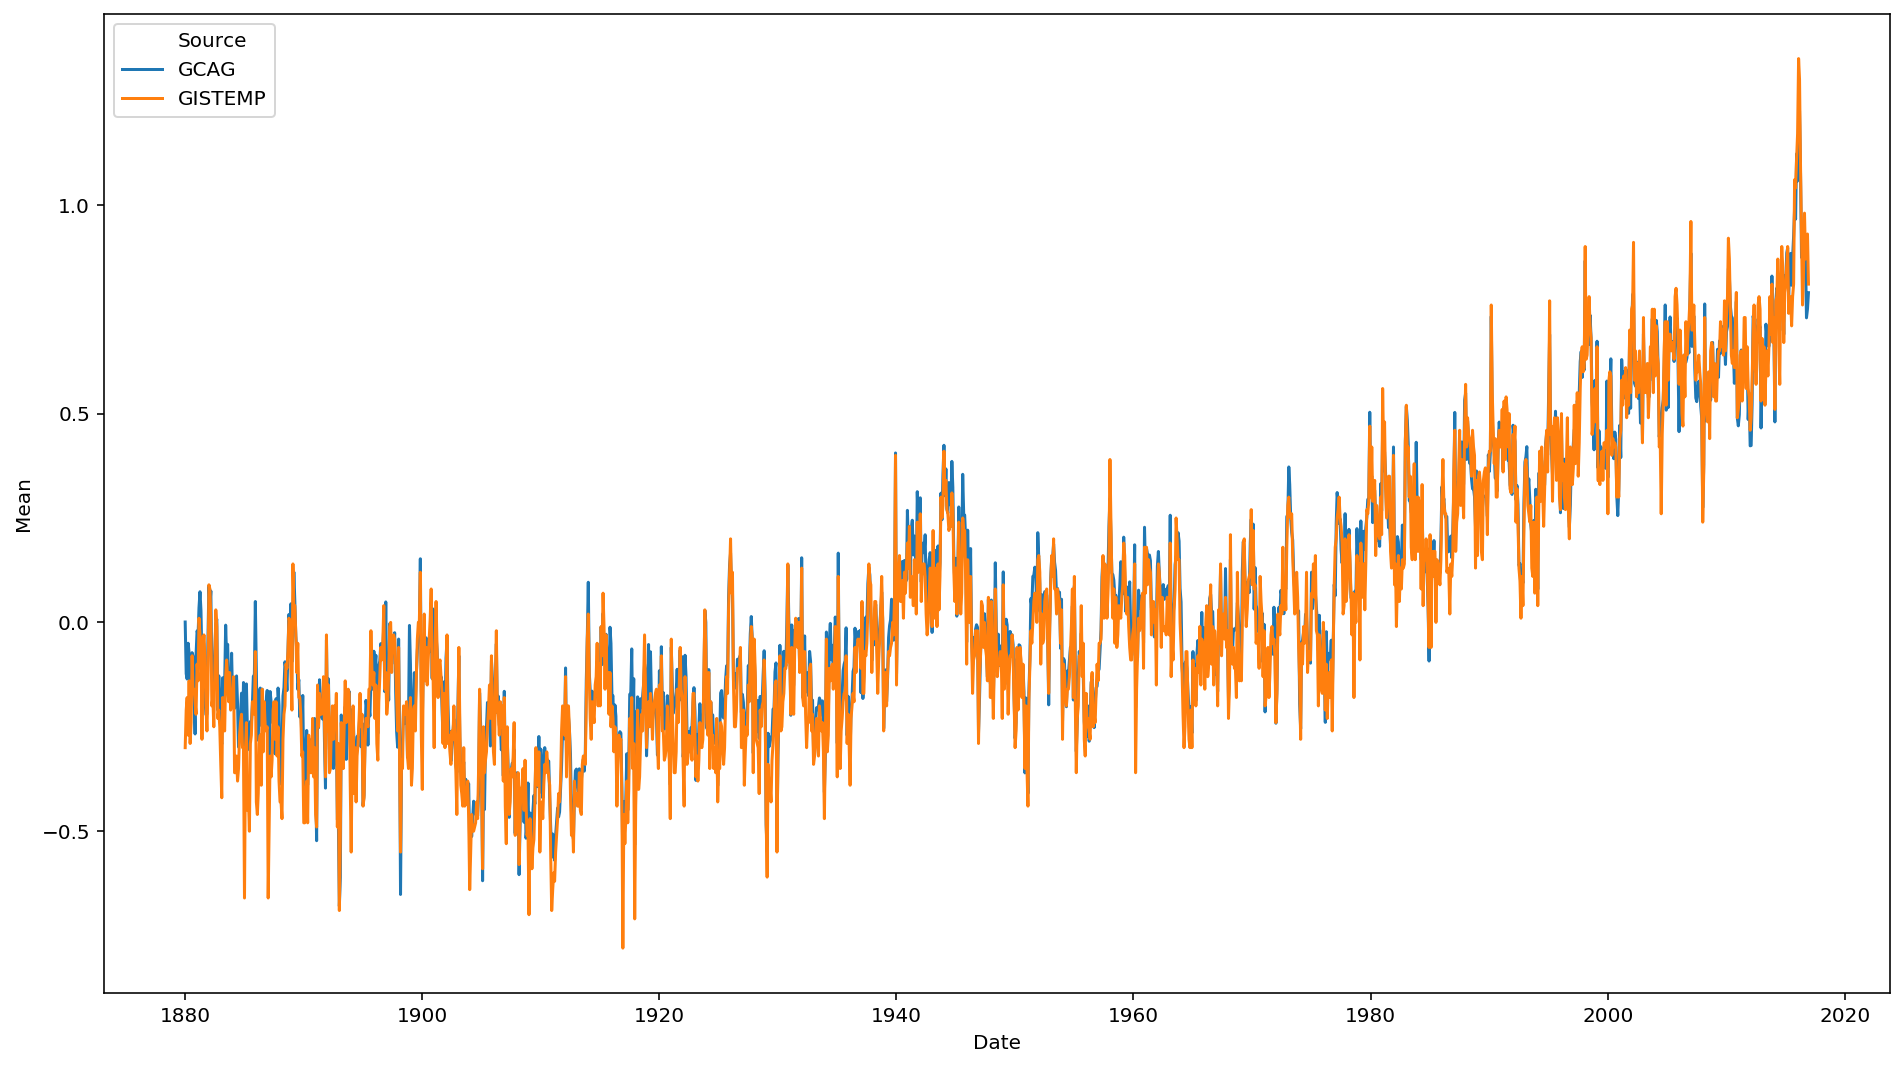

In [16]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Date', y='Mean', data=df.reset_index(), hue='Source')

Text(0.5, 1.0, 'Global temperature from 1880-2016')

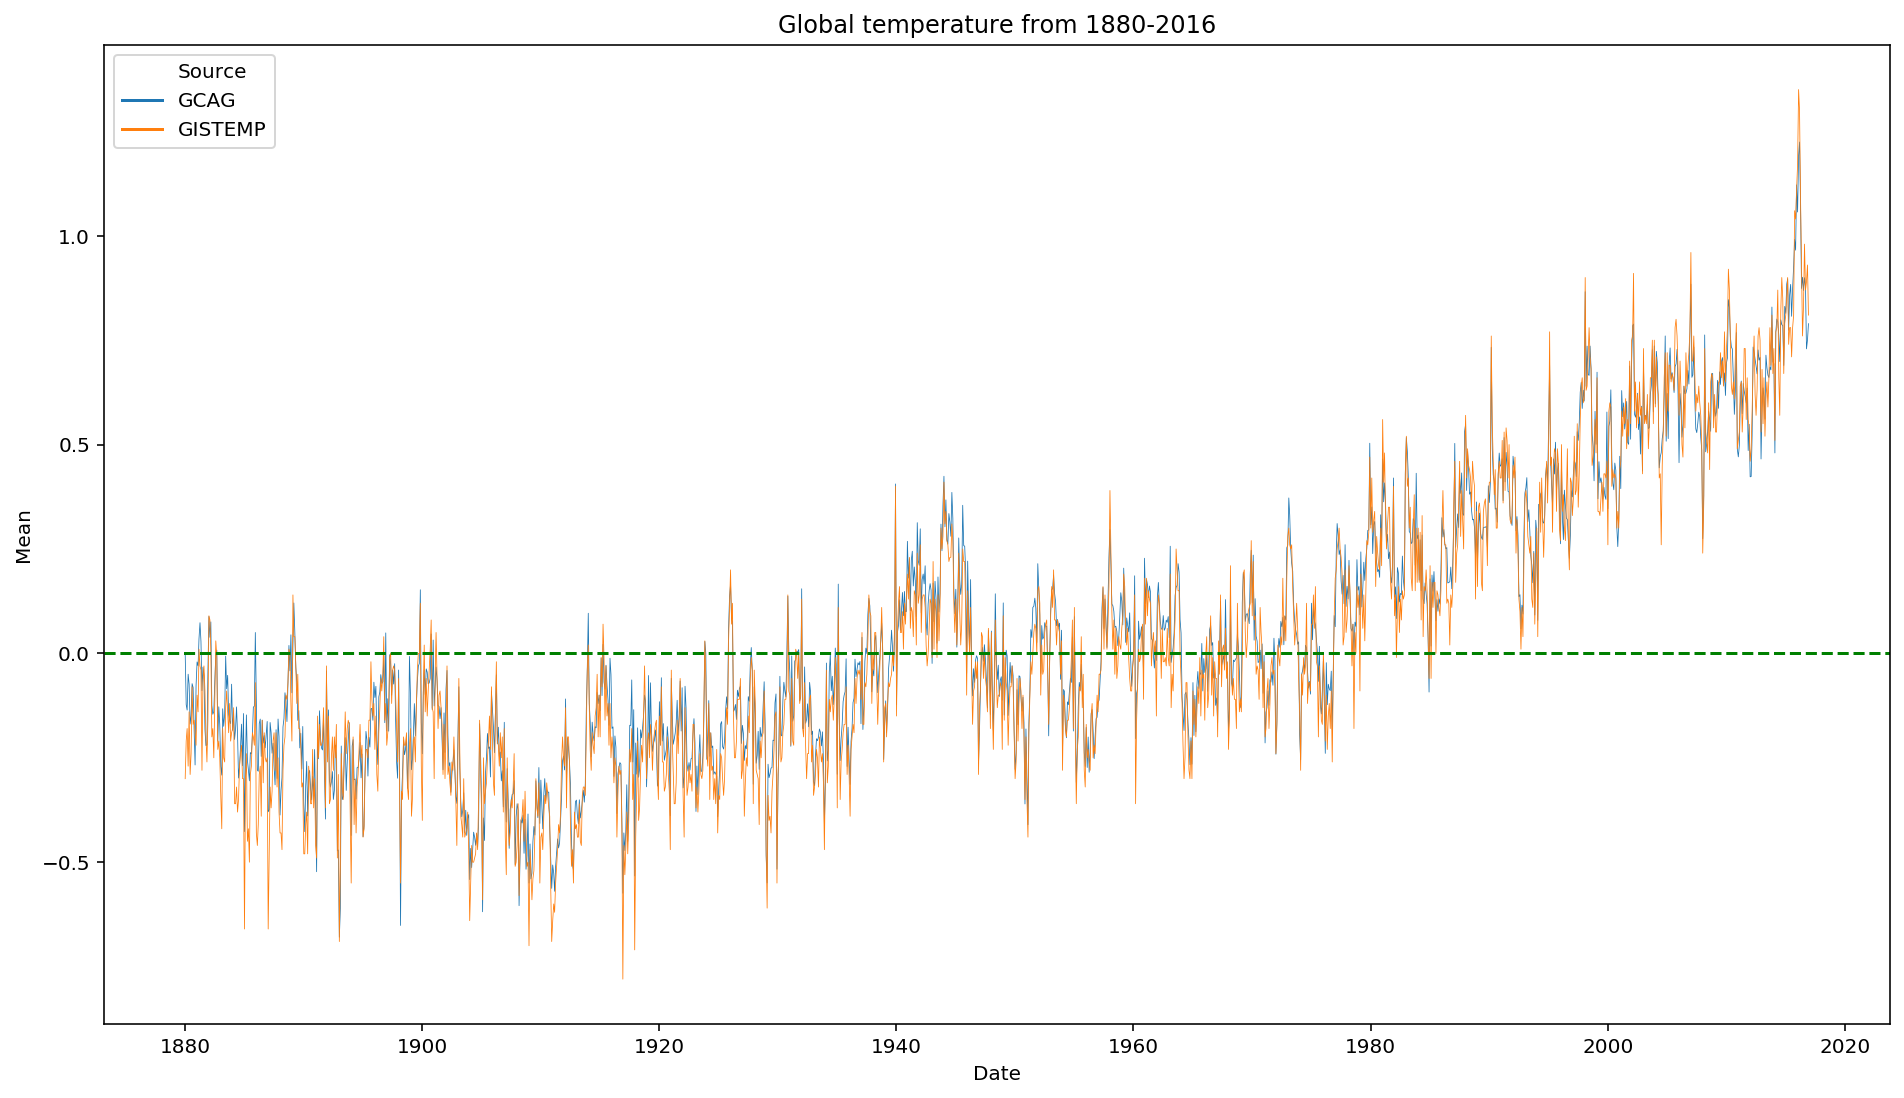

In [17]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Date', y='Mean', data=df.reset_index(), hue='Source', linewidth=.4)
plt.axhline(0, color='green', linestyle='--')
plt.title('Global temperature from 1880-2016')

In [18]:
df.loc['GISTEMP']

,Mean
Date,
1880-01-06,-0.30
1880-02-06,-0.21
1880-03-06,-0.18
1880-04-06,-0.27
1880-05-06,-0.14
...,...
2016-08-06,0.98
2016-09-06,0.87
2016-10-06,0.89


In [19]:
dg=df.loc['GISTEMP'].loc['2000':]
dg

,Mean
Date,
2000-01-06,0.26
2000-02-06,0.58
2000-03-06,0.60
2000-04-06,0.59
2000-05-06,0.40
...,...
2016-08-06,0.98
2016-09-06,0.87
2016-10-06,0.89


Text(0.5, 1.0, 'Global temperature')

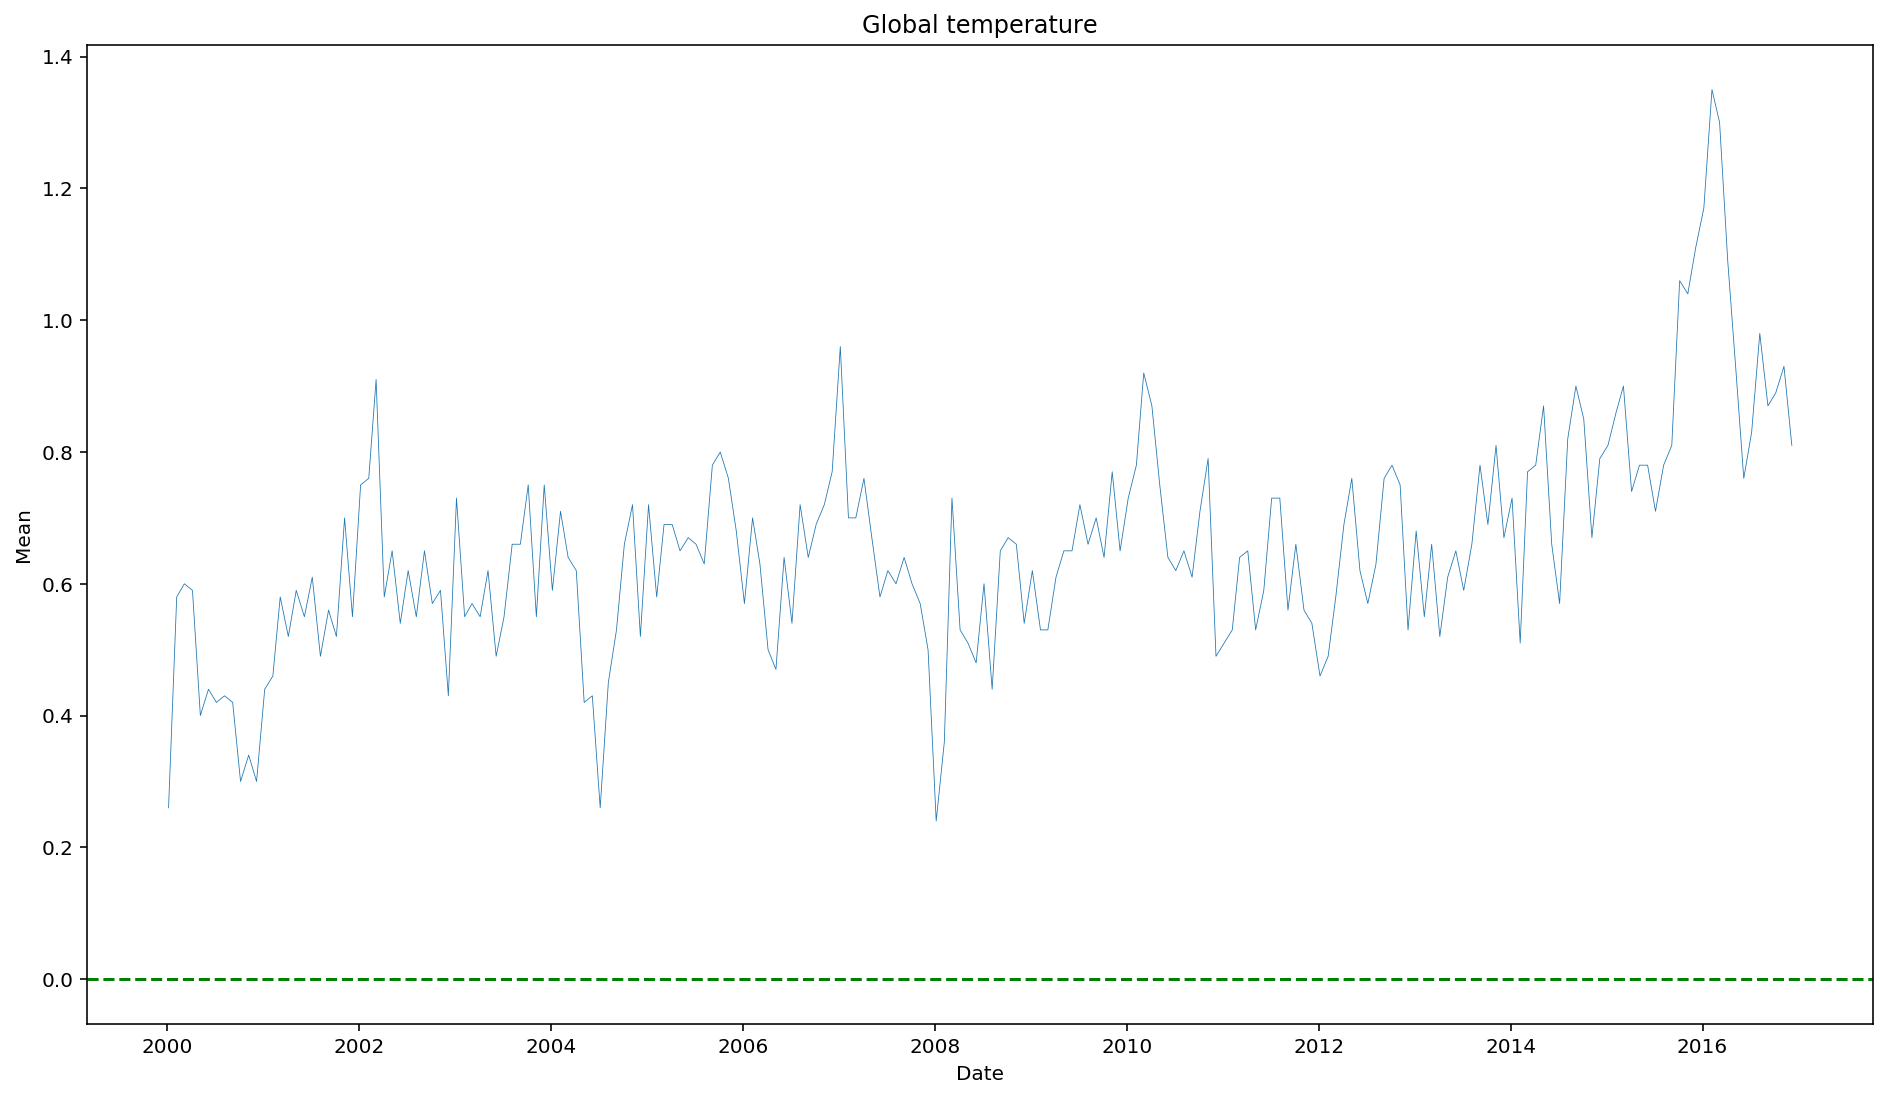

In [20]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Date', y='Mean', data=dg.reset_index(), linewidth=.4)
plt.axhline(0, color='green', linestyle='--')
plt.title('Global temperature')